In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [2]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('HNSC.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_HNSC(np_data)
num_groups = 5

**Logistic Regression (vital status, in-class model)**

In [3]:
y = vital_status

iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

In class model:
Average train final cost: nan
Average train accuracy: 34.04 %
Average train F1 score: 0.37
Average test accuracy: 34.72 %
Average test F1 score: 0.40

Scikit model:
Average train final cost: 6.90
Average train accuracy: 80.03 %
Average train F1 score: 0.76
Average test final cost: 8.88
Average test accuracy: 74.30 %
Average test F1 score: 0.76

Highest average weights:
tumor_status : 11.78
tumor_stage : 3.71
new_tumor_event_type : 3.27


**Linear Regression (days until death, in-class + sklearn model)**

In [4]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 5000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: 14473502.64

Scikit model:
Average train accuracy: 44.66 %
Average test accuracy: 33.60 %


**Multivariable Regression (outcome, in-class model)**

Samples of class 0 : 302
Samples of class 1 : 4
Samples of class 2 : 34
Samples of class 3 : 4
Samples of class 4 : 3

In class model:
Logistic regression:
Average train final cost: nan
Average train accuracy: 58.07 %
Average train F1 score: 0.58
Average test accuracy: 61.67 %
Average test F1 score: 0.62

One vs all:
Average train accuracy: 88.62 %
Average train F1 score: 0.89
Average test accuracy: 82.86 %
Average test F1 score: 0.83

Scikit model:
Average train accuracy: 88.64 %
Average train F1 score: 0.89
Average test accuracy: 84.29 %
Average test F1 score: 0.84

Highest average weights:
tumor_status : 13.27
new_tumor_event_type : 4.45
tumor_stage : 2.91


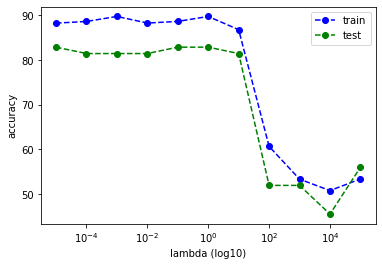

In [5]:
y = outcome
lambda_val = 0.1
interested_in = [0, 2]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)